# Capstone project final report - code

This is part of the Course [<u><b>Applied Data Science Capstone</b></u>](https://www.coursera.org/learn/applied-data-science-capstone/) on Coursera, to complete the Specialization [<u><b>IBM Data Science Professional Certificate</b></u>](https://www.coursera.org/specializations/ibm-data-science-professional-certificate)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-collection" data-toc-modified-id="Data-collection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data collection</a></span><ul class="toc-item"><li><span><a href="#City-annual-Temperature" data-toc-modified-id="City-annual-Temperature-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>City annual Temperature</a></span></li><li><span><a href="#Data-Science-jobs-per-city" data-toc-modified-id="Data-Science-jobs-per-city-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Science jobs per city</a></span></li><li><span><a href="#Foursquare-venues" data-toc-modified-id="Foursquare-venues-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Foursquare venues</a></span></li><li><span><a href="#Assemble-the-data" data-toc-modified-id="Assemble-the-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Assemble the data</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Similarity-score" data-toc-modified-id="Similarity-score-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Similarity score</a></span></li><li><span><a href="#Cluster-European-Cities" data-toc-modified-id="Cluster-European-Cities-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cluster European Cities</a></span><ul class="toc-item"><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li><li><span><a href="#Table" data-toc-modified-id="Table-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Table</a></span></li><li><span><a href="#Map-the-clusters" data-toc-modified-id="Map-the-clusters-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Map the clusters</a></span></li></ul></li><li><span><a href="#For-Junior-Data-Scientists" data-toc-modified-id="For-Junior-Data-Scientists-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>For Junior Data Scientists</a></span></li><li><span><a href="#For-Mid-level-Data-Scientists" data-toc-modified-id="For-Mid-level-Data-Scientists-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>For Mid-level Data Scientists</a></span></li><li><span><a href="#For-Senior-Data-Scientists" data-toc-modified-id="For-Senior-Data-Scientists-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>For Senior Data Scientists</a></span></li><li><span><a href="#For-Companies" data-toc-modified-id="For-Companies-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>For Companies</a></span></li></ul></li></ul></div>

-------------------
Imports

In [1]:
import requests
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import time
from bs4 import BeautifulSoup
import requests
import re

# load foursquare credentials
foursquare_cred = pd.read_csv('foursquare_cred') # saved locally and ignored in .gitignore
CLIENT_ID = foursquare_cred.CLIENT_ID[0] # your Foursquare ID
CLIENT_SECRET = foursquare_cred.CLIENT_SECRET[0] # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
# LocationIQ apikey
apikey = pd.read_table('locationiq_api_key',header=None).iloc[0,0]

%matplotlib inline

## Data collection
### City annual Temperature

Get a list of European Cities by temperature from wikipedia
https://en.wikipedia.org/wiki/List_of_European_cities_by_temperature

In [4]:
url = "https://en.wikipedia.org/wiki/List_of_European_cities_by_temperature"
page = requests.get(url)
soup = BeautifulSoup(page.content,'html.parser')

In [6]:
#headers 
cols = [x.get_text().replace('\n','') for x in soup.select('th')][:-1]

In [7]:
tb_content = [re.sub("\(.*\)",'',x.get_text().replace('\n','') )  for x in soup.select('td')]

In [8]:
# the extraction is a function of len(cols) and len(tb_content) 
## it works even in these case, where the actual #of cols is 16 but I want just the first 15 cols
### but, for it to work, the tb_content needs to be split by the original number of cols, 16

ttable = pd.DataFrame()
for i in range(15):
    ttable[cols[i]] = [tb_content[x] for x in np.arange(i,len(tb_content),16)]
ttable.head()

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Austria,Vienna,0.3,1.5,5.7,10.7,15.7,18.7,20.8,20.2,15.4,10.2,5.1,1.1,10.4
1,Belgium,Brussels,3.3,3.7,6.8,9.8,13.6,16.2,18.4,18.0,14.9,11.1,6.8,3.9,10.5
2,Bulgaria,Sofia,−0.5,1.1,5.4,10.6,15.4,18.9,21.2,21.0,16.5,11.3,5.1,0.7,10.6
3,Croatia,Zagreb,0.3,2.3,6.4,10.7,15.8,18.8,20.6,20.1,15.9,10.5,5.0,1.4,10.7
4,Czech Republic,Prague,−1.4,−0.4,3.6,8.4,13.4,16.1,18.2,17.8,13.5,8.5,3.1,−0.3,8.4


In [9]:
# converting the values from string to float, after replacing the problematic character
ttable.iloc[:,2:] = ttable.iloc[:,2:].apply(lambda x: x.str.replace('−','-').astype('float'))

Get latitude and longitude for the cities 

In [7]:
region = 'eu' # us or eu
search_url = "https://{}1.locationiq.com/v1/search.php".format(region)

ll=[]
for i in range(len(ttable.City)):
    country = ttable.Country[i]
    city = ttable.City[i]
    data = {'key': apikey,'city': city,'country':country,'format': 'json'}
    LIQresponse = requests.get(search_url, params=data)
    lat= LIQresponse.json()[0]['lat']
    lon=LIQresponse.json()[0]['lon']
    name=LIQresponse.json()[0]['display_name']
    ll.append([country,city,lat,lon,name])
    time.sleep(1) # add a pause to not reach the api limit 

In [9]:
lltable = pd.DataFrame(ll,columns='Country,City,lat,lon,display_name'.split(','))
lltable.head()

,Country,City,lat,lon,display_name
0,Austria,Vienna,48.2083537,16.3725042,"Vienna, 1010, Austria"
1,Belgium,Brussels,50.8465573,4.351697,"Brussels, Brussels-Capital, 1000, Belgium"
2,Bulgaria,Sofia,42.6978634,23.3221789,"Sofia, Sofia City, Sofia-City, 1000, Bulgaria"
3,Croatia,Zagreb,45.813177,15.977048,"Zagreb, City of Zagreb, Croatia"
4,Czech Republic,Prague,50.0874654,14.4212535,"Prague, okres Hlavní město Praha, Hlavní město..."


In [10]:
lltable.loc[:,['lat','lon']] = lltable.loc[:,['lat','lon']].astype('float')

In [13]:
temp_ll_table = pd.merge(lltable.drop('display_name',axis=1), ttable)
temp_ll_table.head()

,Country,City,lat,lon,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Austria,Vienna,48.2084,16.3725,0.3,1.5,5.7,10.7,15.7,18.7,20.8,20.2,15.4,10.2,5.1,1.1,10.4
1,Belgium,Brussels,50.8466,4.3517,3.3,3.7,6.8,9.8,13.6,16.2,18.4,18.0,14.9,11.1,6.8,3.9,10.5
2,Bulgaria,Sofia,42.6979,23.3222,-0.5,1.1,5.4,10.6,15.4,18.9,21.2,21.0,16.5,11.3,5.1,0.7,10.6
3,Croatia,Zagreb,45.8132,15.977,0.3,2.3,6.4,10.7,15.8,18.8,20.6,20.1,15.9,10.5,5.0,1.4,10.7
4,Czech Republic,Prague,50.0875,14.4213,-1.4,-0.4,3.6,8.4,13.4,16.1,18.2,17.8,13.5,8.5,3.1,-0.3,8.4


In [14]:
# export to csv
temp_ll_table.to_csv('temp_table.csv')

### Data Science jobs per city

In [97]:
temp_ll_table = pd.read_csv('temp_table.csv',index_col=0)

In [17]:
jtable=[] # jobs table
linkedin_baseurl='https://www.linkedin.com/jobs/search/?keywords=data%20scientist&location='
careerjet_baseurl='https://www.careerjet.com.mt/wsearch/jobs?s=data+scientist&l='

for i in range(temp_ll_table.shape[0]):
    city = temp_ll_table.loc[i,'City']
    country = temp_ll_table.loc[i,'Country']
    print(i,'-',city,'-',country,end='\r')
    # get number of linkedin jobs
    lk=[]; attempt = 1 
    while lk == [] and attempt < 5:
        attempt+=1
        lkres = requests.get(linkedin_baseurl+city+'%2C'+country)
        lk = re.findall(r'"total":(.+?),"links"',str(lkres.content))
        if lk == []:
            time.sleep(1)
    # get number of careerjet jobs
    cj=[]; attempt = 1 
    while cj == [] and attempt < 5:
        attempt+=1
        cjres = requests.get(careerjet_baseurl+city+'%2C+'+country)
        cj = re.findall(r'class="display_results display_inline"><nobr>.+of (.+?) jobs</nobr>',str(cjres.content))
        if lk == []:
            time.sleep(1)
    # append to list
    jtable.append([city,country,lk,cj])

In [18]:
jdf = pd.DataFrame(jtable,columns='City,Country,lk,cj'.split(','))

In [19]:
def takedata(x):
    if x == []:
        return 0
    else:
        return int(x[0])
jjdf = jdf.iloc[:,2:].applymap(lambda x: takedata(x))

In [ ]:
# data collected Jan-15,2019,11AM UTC
# pd.concat([jdf[['Country','City']],jjdf],axis=1).to_csv('scraped_jobs.csv')

In [93]:
jobs_table = pd.read_csv('scraped_jobs.csv',index_col=0)

In [94]:
# take the average of the two sites and normalize by the total
avg = jobs_table.iloc[:,2:].mean(axis=1)
jobs_table['job_index'] = normd = avg/avg.sum()
jobs_table.sort_values(by='job_index',ascending=False).head()

,Country,City,lk,cj,job_index
43,United Kingdom,London,2175,803,0.280573
10,France,Paris,1330,283,0.151969
20,Netherlands,Amsterdam,541,140,0.064161
11,Germany,Berlin,411,159,0.053703
28,Russia,Moscow,364,148,0.048238


In [95]:
# remove absolute values and remove cities with zero jobs
jobs_table2 = jobs_table.drop(['lk','cj'],axis=1).loc[jobs_table.job_index>0].reset_index()
jobs_table2.shape

(36, 4)

In [99]:
# merge jobs and temperature table
tllj_table = pd.merge(temp_ll_table,jobs_table2).drop('index',axis=1)
tllj_table.to_csv('tllj_table.csv')
tllj_table.head()

,Country,City,lat,lon,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,job_index
0,Austria,Vienna,48.208354,16.372504,0.3,1.5,5.7,10.7,15.7,18.7,20.8,20.2,15.4,10.2,5.1,1.1,10.4,0.012060
1,Belgium,Brussels,50.846557,4.351697,3.3,3.7,6.8,9.8,13.6,16.2,18.4,18.0,14.9,11.1,6.8,3.9,10.5,0.027982
2,Bulgaria,Sofia,42.697863,23.322179,-0.5,1.1,5.4,10.6,15.4,18.9,21.2,21.0,16.5,11.3,5.1,0.7,10.6,0.004805
3,Croatia,Zagreb,45.813177,15.977048,0.3,2.3,6.4,10.7,15.8,18.8,20.6,20.1,15.9,10.5,5.0,1.4,10.7,0.000188
4,Czech Republic,Prague,50.087465,14.421254,-1.4,-0.4,3.6,8.4,13.4,16.1,18.2,17.8,13.5,8.5,3.1,-0.3,8.4,0.011212


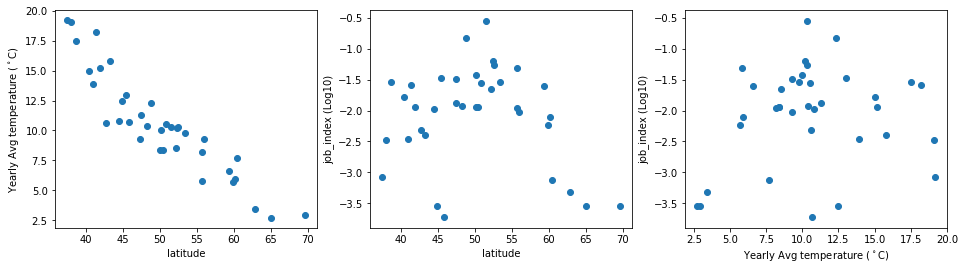

In [7]:
#tllj_table.loc[:,['lat','Year']].plot.scatter('lat','Year')
#tllj_table.loc[:,['Year','job_index']].plot.scatter('Year','job_index')

year_tmp = tllj_table['Year']
lat_cities = tllj_table['lat']
jobs_cities_log = np.log10(tllj_table['job_index'].values)

fig, axs = plt.subplots(1, 3, figsize=(16,4))
axs[0].scatter(lat_cities,year_tmp)
axs[0].set_xlabel('latitude')
axs[0].set_ylabel('Yearly Avg temperature ($^\circ$C)')
axs[1].scatter(lat_cities,jobs_cities_log)
axs[1].set_xlabel('latitude')
axs[1].set_ylabel('job_index (Log10)')
axs[2].scatter(year_tmp,jobs_cities_log)
axs[2].set_xlabel('Yearly Avg temperature ($^\circ$C)')
axs[2].set_ylabel('job_index (Log10)')
plt.show()

### Foursquare venues

In [11]:
tllj_table['City,Country,lat,lon'.split(',')].head()

,City,Country,lat,lon
0,Vienna,Austria,48.208354,16.372504
1,Brussels,Belgium,50.846557,4.351697
2,Sofia,Bulgaria,42.697863,23.322179
3,Zagreb,Croatia,45.813177,15.977048
4,Prague,Czech Republic,50.087465,14.421254


In [15]:
lat = tllj_table.loc[0,'lat']
lng = tllj_table.loc[0,'lon']
radius = 5000 # meters, max = 100,000 ## https://developer.foursquare.com/docs/api/venues/search
LIMIT = 500
INTENT = 'browse'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&intent={}'.format(
    CLIENT_ID, CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT,INTENT)

In [16]:
FSres = requests.get(url).json()["response"]['groups'][0]['items']

In [17]:
len([v['venue']['categories'][0]['name'] for v in FSres])

100

In [32]:
tt = pd.DataFrame({'car':'plane,cow,phase,tree,tree,knot'.split(',')})
pd.get_dummies(tt,prefix='',prefix_sep='').mean(axis=0).sum()

1.0

In [52]:
df = tllj_table
venues_list=[]
for city, country,lat,lon in zip(df.City,df.Country,df.lat,df.lon):
    print(city,end='\r')
    # create the API request URL
    radius = 5000 # meters, max = 100,000 ## https://developer.foursquare.com/docs/api/venues/search
    LIMIT = 500
    INTENT = 'browse'
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}\
    &client_secret={}&v={}&ll={},{}&radius={}&limit={}&intent={}'\
    .format(CLIENT_ID, CLIENT_SECRET,VERSION,lat,lon,radius,LIMIT,INTENT)
    results = requests.get(url).json()["response"]['groups'][0]['items']
    # return only relevant information for each nearby venue
    venues_list.append( [ ( city, country,lat,lng, 
        v['venue']['categories'][0]['name'] ) for v in results ] )

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = ['City','Country','lat','lon','Venue_Category']

In [56]:
nearby_venues.groupby('City').count()['Venue_Category'].sort_values().head()

City
Kuopio        27
Amsterdam    100
Madrid       100
Marseille    100
Milan        100
Name: Venue_Category, dtype: int64

Remove the city that does not return the max venues

In [79]:
vcount = nearby_venues.groupby('City').count()[['Venue_Category']].rename(columns={'Venue_Category':'Venue_count'})
selected_cities = vcount.loc[vcount.Venue_count==vcount.Venue_count.max()].index.values.tolist()

In [89]:
bool_cities = [city in selected_cities for city in nearby_venues.City]
nearby_venues_sel = nearby_venues.loc[bool_cities]

In [96]:
nearby_venues_sel.groupby('City').count().min()

Country           100
lat               100
lon               100
Venue_Category    100
dtype: int64

In [99]:
# exported Jan-17,2019,12:25 UTC
# nearby_venues_sel.to_csv('nearby_venues_sel.csv',encoding='utf-8-sig')

In [13]:
nearby_venues_sel = pd.read_csv('nearby_venues_sel.csv',index_col=0)
nearby_venues_sel.head()

,City,Country,lat,lon,Venue_Category
0,Vienna,Austria,48.208354,16.372504,Plaza
1,Vienna,Austria,48.208354,16.372504,Church
2,Vienna,Austria,48.208354,16.372504,Restaurant
3,Vienna,Austria,48.208354,16.372504,Cocktail Bar
4,Vienna,Austria,48.208354,16.372504,Pedestrian Plaza


In [40]:
# test onehot encoding
pd.get_dummies(nearby_venues_sel.iloc[np.r_[0:5, 101:106, 201:206],:]\
               [['City','Venue_Category']].set_index('City'),prefix='',prefix_sep='')\
                .reset_index().groupby('City').mean().reset_index()

,City,Art Gallery,Bar,Church,Cocktail Bar,Concert Hall,Italian Restaurant,Park,Pedestrian Plaza,Plaza,Restaurant,Sandwich Place,Shopping Mall,Theater
0,Brussels,0.0,0.2,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.0
1,Sofia,0.2,0.0,0.0,0.0,0.0,0.4,0.2,0.0,0.0,0.0,0.0,0.0,0.2
2,Vienna,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.2,0.2,0.2,0.0,0.0,0.0


In [91]:
# onehot encoding
venues_ot = pd.get_dummies(nearby_venues_sel\
                           [['City','Venue_Category']].set_index('City'),prefix='',prefix_sep='')\
                            .reset_index().groupby('City').mean().reset_index()
print(venues_ot.shape[0],'Cities')
print(venues_ot.shape[1]-1,'Venue categories')

35 Cities
300 Venue categories


In [80]:
# see the frenquency of common venues
com = [0]+[list(venues_ot.columns).index(x) for x in ['Café','Church','Restaurant']]
venues_ot.iloc[:10,com]

,City,Café,Church,Restaurant
0,Amsterdam,0.04,0.00,0.04
1,Athens,0.07,0.00,0.00
2,Barcelona,0.01,0.00,0.02
3,Belgrade,0.05,0.00,0.07
4,Bergen,0.07,0.00,0.05
5,Berlin,0.02,0.00,0.01
6,Brussels,0.01,0.00,0.01
7,Bucharest,0.02,0.01,0.04
8,Budapest,0.02,0.01,0.04
9,Copenhagen,0.08,0.00,0.02


### Assemble the data

In [101]:
tllj_table = pd.read_csv('tllj_table.csv',index_col=0)
tllj_table.head()

,Country,City,lat,lon,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,job_index
0,Austria,Vienna,48.208354,16.372504,0.3,1.5,5.7,10.7,15.7,18.7,20.8,20.2,15.4,10.2,5.1,1.1,10.4,0.012060
1,Belgium,Brussels,50.846557,4.351697,3.3,3.7,6.8,9.8,13.6,16.2,18.4,18.0,14.9,11.1,6.8,3.9,10.5,0.027982
2,Bulgaria,Sofia,42.697863,23.322179,-0.5,1.1,5.4,10.6,15.4,18.9,21.2,21.0,16.5,11.3,5.1,0.7,10.6,0.004805
3,Croatia,Zagreb,45.813177,15.977048,0.3,2.3,6.4,10.7,15.8,18.8,20.6,20.1,15.9,10.5,5.0,1.4,10.7,0.000188
4,Czech Republic,Prague,50.087465,14.421254,-1.4,-0.4,3.6,8.4,13.4,16.1,18.2,17.8,13.5,8.5,3.1,-0.3,8.4,0.011212


In [130]:
tllj_sel = tllj_table.iloc[[list(tllj_table.City).index(x) for x in venues_ot.City],:].reset_index(drop='index')

# final table with all the data = Country, City, lat, lon, temperature, jobs, Foursquare_venue_category
assembled_data = pd.concat([tllj_sel,venues_ot.iloc[:,1:]],axis=1)
assembled_data.to_csv('assembled_data.csv')
assembled_data.iloc[:4,:4]

,Country,City,lat,lon
0,Netherlands,Amsterdam,52.374540,4.897976
1,Greece,Athens,37.984149,23.727984
2,Spain,Barcelona,41.382894,2.177432
3,Serbia,Belgrade,44.817813,20.456897


## Analysis
### Data preparation

In [5]:
# read data and keep relevant columns
assembled_data = pd.read_csv('assembled_data.csv',index_col=0)
# city, temp, jobs, foursquare
ctjf_data = assembled_data.loc[:,~assembled_data.columns.isin('Country,lat,lon,Year'.split(','))]
print(ctjf_data.shape)
ctjf_data.iloc[:5,:16]

(35, 314)


,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,job_index,Accessories Store,Adult Boutique
0,Amsterdam,3.4,3.5,6.1,9.1,12.9,15.4,17.6,17.5,14.7,11.0,7.1,4.0,0.064161,0.0,0.0
1,Athens,10.2,10.8,13.1,16.8,21.7,26.6,29.3,29.2,25.0,20.1,15.4,11.5,0.003392,0.0,0.0
2,Barcelona,11.8,12.4,14.2,15.8,19.3,23.0,25.7,26.1,23.0,19.5,14.9,12.3,0.025532,0.0,0.0
3,Belgrade,1.4,3.1,7.6,12.9,18.1,21.0,23.0,22.7,18.0,12.9,7.1,2.7,0.000283,0.0,0.0
4,Bergen,1.5,1.6,3.3,5.9,10.5,13.5,14.5,14.4,11.5,8.7,4.7,2.6,0.000754,0.0,0.0


**Columns**   
0 : City   
1-12 : Temperature (12 features)    
13 : job_index (1 feature)    
14 - 313 : Foursquare venue categories (300 features)    

------------------
I'll also make a presentation table, with Year average temperature, Jobs in % of total and 5 most common venue type 

In [6]:
pres_table = assembled_data[['Country','City','Year']].copy()
pres_table['Jobs (%)'] = assembled_data.job_index.apply(lambda x: x*100).round(2)
pres_table.rename(columns={'Year':'Year Temp'},inplace=True)
mc_venues = pd.DataFrame([[cc]+list(ctjf_data.loc[ctjf_data.City==cc].iloc[:,np.r_[0,14:313]].set_index('City')\
    .T.sort_values(by=cc,ascending=False).iloc[:5,:].index.values) for cc in pres_table.City],\
    columns='City, Most common venue, 2nd most common, 3rd most common, 4th most common, 5th most common'\
    .split(', '))
pres_tablef = pd.merge(pres_table,mc_venues)
pres_tablef.head()

,Country,City,Year Temp,Jobs (%),Most common venue,2nd most common,3rd most common,4th most common,5th most common
0,Netherlands,Amsterdam,10.2,6.42,Hotel,French Restaurant,Sandwich Place,Bookstore,Restaurant
1,Greece,Athens,19.1,0.34,Bar,Café,Cocktail Bar,Coffee Shop,Wine Bar
2,Spain,Barcelona,18.2,2.55,Tapas Restaurant,Hotel,Spanish Restaurant,Bookstore,Cocktail Bar
3,Serbia,Belgrade,12.5,0.03,Restaurant,Coffee Shop,Bar,Café,Cocktail Bar
4,Norway,Bergen,7.7,0.08,Bar,Café,Hotel,Coffee Shop,Scandinavian Restaurant


### Similarity score

To correct for the different number of features I will use the weighted Minkowski distance.

First, I will compare all cities between themselves using the same weight for each type of data, and perform hierarchical cluster to group them.

Then, I will perform 4 types of comparisons, based on 4 possible stakeholders:

1. **Junior Data Science practitioner** :: select the 5 best markets, then get the match score based on temperature and venues
- **mid-level** :: get score with the same weight to the 3 measures
- **Senior** :: get the score with zero weight on job opportunities
- **Company** :: get the 5 worst markets and get the match score for temperature and venues on them

Before I can work with the distances I have to normalize the job index because the data is skewed. London and Paris together have almost 45% of the total jobs, for instance. The job_index will be logged for the clustering but will be used as percentage in the discussion, for clarity. 

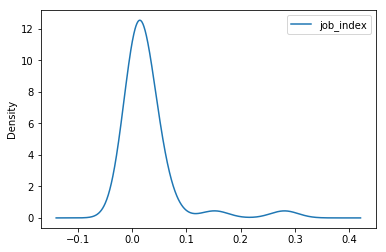

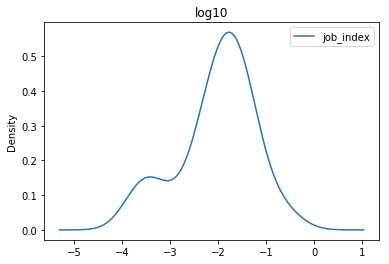

In [7]:
ctjf_data[['job_index']].plot.density()
np.log10(ctjf_data[['job_index']]).plot.density()
plt.title('log10')
plt.show()

In [8]:
# log10 the job_index
ctjf_data2 = ctjf_data.copy()
ctjf_data2['job_index'] = np.log10(ctjf_data2.job_index)

In [9]:
from scipy.spatial.distance import pdist, minkowski, minkowski, squareform
from scipy.cluster import hierarchy
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [10]:
# Function to get the dissimilarity matrix for the temp-job-foursquare data
def ctjf_wmink(df,tw,jw,fw):
    ## temp_weight,job_weight,foursquare_weight
    # data scaling
    x = df.iloc[:,1:].values
    X = MinMaxScaler().fit(x).transform(x)
    #X = StandardScaler().fit(x).transform(x)

    # weights
    l1,l2,l3 = 12,1,300 #of features for each class of data
    wl = np.array([[tw,jw,fw],[l1,l2,l3]])
    ws=[] #weights
    for i in range(3):
        ws+=[wl[0,i]/wl[1,i]]*wl[1,i]
    # Weighted Minkowski
    dx = pdist(X,minkowski,w=ws)
    # square the condensed matrix
    cdx = squareform(dx)
    return(cdx)

### Cluster European Cities
First I will cluster all the cities in the Data with the same weight on each variable, to get a baseline for the further comparisons.

#### Hierarchical Clustering

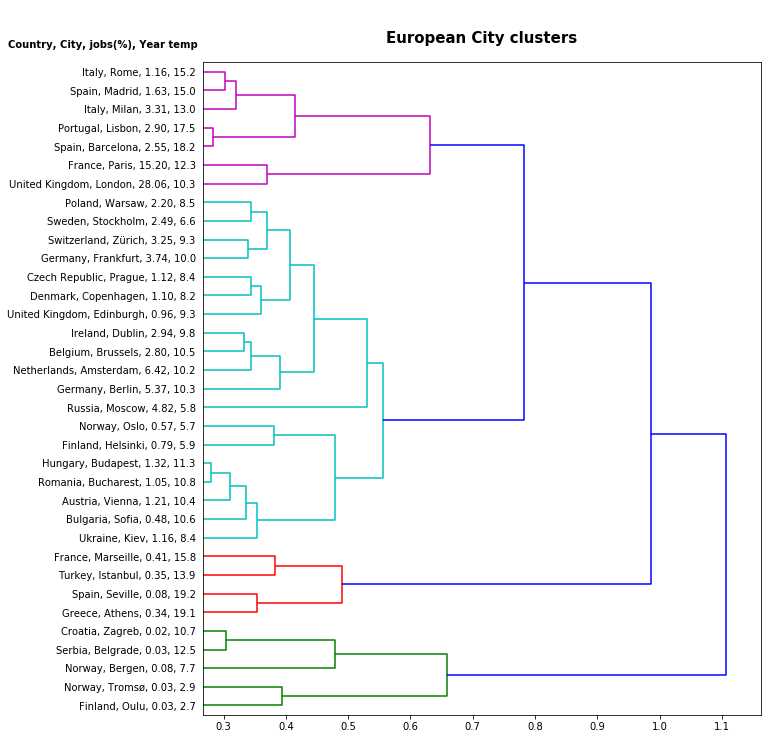

In [12]:
cdx = ctjf_wmink(ctjf_data2,tw=1,jw=1,fw=1)
#ctjf_dendro(cdx,'')
# labels = ttable.City.values
df = assembled_data
labels = ['{}, {}, {:.2f}, {}'.\
          format(df.Country[i],df.City[i],df.job_index[i]*100,df.Year[i]) for i in range(len(df.City.values))]
# hierarchical cluster
ccdx = hierarchy.complete(squareform(cdx)) # squareform is its own inverse, condenses and expands depending on the shape
plt.figure(figsize=(10,12))
R = hierarchy.dendrogram(ccdx,labels=labels,orientation='right',leaf_font_size=10)

mask = np.ones(cdx.shape, dtype=bool)
np.fill_diagonal(mask, 0)
plt.xlim(cdx[mask].min()*.95,cdx[mask].max()*1.05)
plt.title('European City clusters',fontdict={'fontsize': 15,'fontweight':'bold','verticalalignment':'baseline'},pad=20 )
plt.annotate('Country, City, jobs(%), Year temp',xy=(0.01,0.935),xycoords='figure fraction',\
             fontweight='bold')
plt.show()

#### Table

In [13]:
# choosing the cluster that has Lisbon
c0_pres_table = pres_tablef.copy()
# define clusters - using default dendrogram cut method for the colors, from Matlab >> 0.7*max(Z[:,2])
# https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html
c0_pres_table['Cluster'] = hierarchy.fcluster(ccdx,0.7*max(ccdx[:,2]),'distance') 
chosen_cluster = c0_pres_table.loc[c0_pres_table.City=='Lisbon','Cluster'].values[0]
c0_pres_table.loc[c0_pres_table.Cluster==chosen_cluster].sort_values(by=['Cluster','Jobs (%)'],ascending=False)

,Country,City,Year Temp,Jobs (%),Most common venue,2nd most common,3rd most common,4th most common,5th most common,Cluster
17,United Kingdom,London,10.3,28.06,Hotel,Theater,Steakhouse,Indian Restaurant,Seafood Restaurant,4
24,France,Paris,12.3,15.20,French Restaurant,Plaza,Cocktail Bar,Sandwich Place,Wine Bar,4
20,Italy,Milan,13.0,3.31,Hotel,Boutique,Ice Cream Shop,Italian Restaurant,Dessert Shop,4
16,Portugal,Lisbon,17.5,2.90,Plaza,Wine Bar,Portuguese Restaurant,Scenic Lookout,Café,4
2,Spain,Barcelona,18.2,2.55,Tapas Restaurant,Hotel,Spanish Restaurant,Bookstore,Cocktail Bar,4
18,Spain,Madrid,15.0,1.63,Restaurant,Plaza,Hotel,Tapas Restaurant,Café,4
26,Italy,Rome,15.2,1.16,Plaza,Historic Site,Ice Cream Shop,Sandwich Place,Italian Restaurant,4


#### Map the clusters

In [223]:
# Plotting the clusters on a map
df = assembled_data
# European map
lat = 55
lon = 12.102151
Fmap = folium.Map(location=[float(lat), float(lon)], zoom_start=3 , control_scale = True)

# Plot just the cities ---------------------------------------------------------------------------------
# df = assembled_data
# # add markers to map
# for lat, lng, city, country in zip(df['lat'], df['lon'], df['City'], df['Country']):
#     label = '{}, {}'.format(city, country)
#     label = folium.Popup(label, parse_html=True)
#     folium.CircleMarker(  # Circle makes a difined size circle, CircleMarker makes a circle of the same size in all zooms
#         [lat, lng],
#         radius=5,
#         popup=label,
#         color='blue',
#         fill=True,
#         fill_color='#3186cc',
#         fill_opacity=0.7,
#         parse_html=False).add_to(Fmap)  
# Fmap

# Plot cities and clusters  ---------------------------------------------------------------------------------

# set color scheme for the clusters
# k = len(c0_pres_table['Cluster'].unique())
# cmap = cm.get_cmap('Set1', k+1)
# rainbow = [colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)][:-1]
## http://colorbrewer2.org/#type=qualitative&scheme=Set1&n=5
rainbow = '#e41a1c,#377eb8,#4daf4a,#ff7f00'.split(',')

# add markers to map
for lat, lng, cluster, city, country in zip(df['lat'], df['lon'], 
                                            c0_pres_table['Cluster'], df['City'], df['Country']):
     label = 'Cluster: {}, {}, {}'.format(cluster, city, country)
     label = folium.Popup(label, parse_html=True)
     folium.CircleMarker(  
        [lat, lng], radius=6, popup=label, color=rainbow[cluster-1],
        fill=True, fill_color=rainbow[cluster-1], fill_opacity=1, parse_html=False).add_to(Fmap)  
Fmap

### For Junior Data Scientists
select the 5 best markets, then get the match score between the base city and the others, based on temperature and venues

In [169]:
# Top 5 markets
sel_t5j = list(pres_tablef.sort_values(by='Jobs (%)',ascending=False).head(5).City.values)
# I'm selecting Lisbon as the comparison city
base_city = ['Lisbon']
sel_c1 = base_city + sel_t5j
sel_c1_ind = [pd.Index(pres_tablef.City).get_loc(x) for x in sel_c1]
c1_pres_table = pres_tablef.iloc[sel_c1_ind,:].copy()
# now I can get the similarity matrix using zero weight for jobs to compare temperature and venues 
dx_junior = ctjf_wmink(ctjf_data2,tw=1,jw=0,fw=1)
dx_junior_df = pd.DataFrame(dx_junior,index=ctjf_data2.City.values,columns=ctjf_data2.City.values)
c1_pres_table['Match'] = dx_junior_df.loc[sel_c1,base_city].apply(lambda x: 100*(1-x)).round(2).values
c1_pres_table = c1_pres_table.sort_values(by='Match',ascending=False)
c1_pres_table

,Country,City,Year Temp,Jobs (%),Most common venue,2nd most common,3rd most common,4th most common,5th most common,Match
16,Portugal,Lisbon,17.5,2.90,Plaza,Wine Bar,Portuguese Restaurant,Scenic Lookout,Café,100.00
24,France,Paris,12.3,15.20,French Restaurant,Plaza,Cocktail Bar,Sandwich Place,Wine Bar,58.45
0,Netherlands,Amsterdam,10.2,6.42,Hotel,French Restaurant,Sandwich Place,Bookstore,Restaurant,51.00
17,United Kingdom,London,10.3,28.06,Hotel,Theater,Steakhouse,Indian Restaurant,Seafood Restaurant,50.58
5,Germany,Berlin,10.3,5.37,Coffee Shop,Bookstore,Park,History Museum,Monument / Landmark,49.16
21,Russia,Moscow,5.8,4.82,Plaza,Art Gallery,Road,Bookstore,Hotel,25.35


### For Mid-level Data Scientists
Top 5 cities to move to based on score, with the same weight to the 3 measures

In [186]:
# dissimilarity matrix
dx_mid = ctjf_wmink(ctjf_data2,tw=1,jw=1,fw=1)
# convert to df
dx_mid_df = pd.DataFrame(dx_mid,index=ctjf_data2.City.values,columns=ctjf_data2.City.values)
# select the best 5 matches to base_city
c2_matches = dx_mid_df[base_city].sort_values(by=base_city).head(6)
sel_c2 = list(c2_matches.index.values)
# index in pres_tablef
sel_c2_ind = [pd.Index(pres_tablef.City).get_loc(x) for x in sel_c2]
c2_pres_table = pres_tablef.iloc[sel_c2_ind,:].copy()
c2_pres_table['Match'] = c2_matches.apply(lambda x: 100*(1-x)).round(2).values
# result
c2_pres_table

,Country,City,Year Temp,Jobs (%),Most common venue,2nd most common,3rd most common,4th most common,5th most common,Match
16,Portugal,Lisbon,17.5,2.90,Plaza,Wine Bar,Portuguese Restaurant,Scenic Lookout,Café,100.00
2,Spain,Barcelona,18.2,2.55,Tapas Restaurant,Hotel,Spanish Restaurant,Bookstore,Cocktail Bar,71.76
26,Italy,Rome,15.2,1.16,Plaza,Historic Site,Ice Cream Shop,Sandwich Place,Italian Restaurant,67.29
18,Spain,Madrid,15.0,1.63,Restaurant,Plaza,Hotel,Tapas Restaurant,Café,66.36
20,Italy,Milan,13.0,3.31,Hotel,Boutique,Ice Cream Shop,Italian Restaurant,Dessert Shop,60.49
19,France,Marseille,15.8,0.41,Plaza,Hotel,Bar,French Restaurant,Provençal Restaurant,59.67


### For Senior Data Scientists
get the score with zero weight on job opportunities

In [187]:
# dissimilarity matrix
dx_mid = ctjf_wmink(ctjf_data2,tw=1,jw=0,fw=1)
# convert to df
dx_mid_df = pd.DataFrame(dx_mid,index=ctjf_data2.City.values,columns=ctjf_data2.City.values)
# select the best 5 matches to base_city
c3_matches = dx_mid_df[base_city].sort_values(by=base_city).head(6)
sel_c3 = list(c3_matches.index.values)
# index in pres_tablef
sel_c3_ind = [pd.Index(pres_tablef.City).get_loc(x) for x in sel_c3]
c3_pres_table = pres_tablef.iloc[sel_c3_ind,:].copy()
c3_pres_table['Match'] = c3_matches.apply(lambda x: 100*(1-x)).round(2).values
# result
c3_pres_table

,Country,City,Year Temp,Jobs (%),Most common venue,2nd most common,3rd most common,4th most common,5th most common,Match
16,Portugal,Lisbon,17.5,2.90,Plaza,Wine Bar,Portuguese Restaurant,Scenic Lookout,Café,100.00
2,Spain,Barcelona,18.2,2.55,Tapas Restaurant,Hotel,Spanish Restaurant,Bookstore,Cocktail Bar,71.82
27,Spain,Seville,19.2,0.08,Tapas Restaurant,Spanish Restaurant,Plaza,Hotel,Ice Cream Shop,71.69
19,France,Marseille,15.8,0.41,Plaza,Hotel,Bar,French Restaurant,Provençal Restaurant,69.99
26,Italy,Rome,15.2,1.16,Plaza,Historic Site,Ice Cream Shop,Sandwich Place,Italian Restaurant,69.80
18,Spain,Madrid,15.0,1.63,Restaurant,Plaza,Hotel,Tapas Restaurant,Café,67.30


### For Companies
get the 5 worst markets and get the match score for temperature and venues on them

In [189]:
# Bottom 5 markets
sel_b5j = list(pres_tablef.sort_values(by='Jobs (%)',ascending=True).head(5).City.values)
# I'm selecting Lisbon as the comparison city
base_city = ['Lisbon']
sel_c4 = base_city + sel_b5j
sel_c4_ind = [pd.Index(pres_tablef.City).get_loc(x) for x in sel_c4]
c4_pres_table = pres_tablef.iloc[sel_c4_ind,:].copy()
# now I can get the similarity matrix using zero weight for jobs to compare temperature and venues 
dx_junior = ctjf_wmink(ctjf_data2,tw=1,jw=0,fw=1)
dx_junior_df = pd.DataFrame(dx_junior,index=ctjf_data2.City.values,columns=ctjf_data2.City.values)
c4_pres_table['Match'] = dx_junior_df.loc[sel_c4,base_city].apply(lambda x: 100*(1-x)).round(2).values
c4_pres_table = c4_pres_table.sort_values(by='Match',ascending=False)
c4_pres_table

,Country,City,Year Temp,Jobs (%),Most common venue,2nd most common,3rd most common,4th most common,5th most common,Match
16,Portugal,Lisbon,17.5,2.90,Plaza,Wine Bar,Portuguese Restaurant,Scenic Lookout,Café,100.00
3,Serbia,Belgrade,12.5,0.03,Restaurant,Coffee Shop,Bar,Café,Cocktail Bar,57.16
33,Croatia,Zagreb,10.7,0.02,Café,Plaza,Bar,Dessert Shop,Restaurant,53.42
4,Norway,Bergen,7.7,0.08,Bar,Café,Hotel,Coffee Shop,Scandinavian Restaurant,40.05
30,Norway,Tromsø,2.9,0.03,Hotel,Bar,Café,Grocery Store,Coffee Shop,15.35
23,Finland,Oulu,2.7,0.03,Grocery Store,Pizza Place,Café,Fast Food Restaurant,Hotel,11.73
